# 4.5 GBM

In [6]:
import pandas as pd

# 중복된 피처명 수정 함수 (예시 구현)
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    new_feature_name_df = old_feature_name_df.copy()
    new_feature_name_df['column_name'] = new_feature_name_df['column_name'] + '_' + feature_dup_df['dup_cnt'].astype(str)
    return new_feature_name_df

def get_human_dataset():
    # 1. 피처 이름 로드
    feature_name_df = pd.read_csv(
        './features.txt',
        sep='\s+',
        header=None,
        names=['column_index', 'column_name']
    )

    # 2. 중복 피처명 처리
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    # 3. 학습 데이터 로드
    X_train = pd.read_csv(
        './X_train.txt',
        sep='\s+',
        names=feature_name
    )
    y_train = pd.read_csv(
        './y_train.txt',
        sep='\s+',
        header=None,
        names=['action']
    )

    # 4. 테스트 데이터 로드
    X_test = pd.read_csv(
        './X_test.txt',
        sep='\s+',
        names=feature_name
    )
    y_test = pd.read_csv(
        './y_test.txt',
        sep='\s+',
        header=None,
        names=['action']
    )

    # 5. 반환
    return X_train, X_test, y_train, y_test

# 함수 실행 예시
X_train, X_test, y_train, y_test = get_human_dataset()
print("훈련 데이터 크기:", X_train.shape, y_train.shape)
print("테스트 데이터 크기:", X_test.shape, y_test.shape)


<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:32: SyntaxWarning: invalid escape sequence '\s'
<>:40: SyntaxWarning: invalid escape sequence '\s'
<>:45: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:32: SyntaxWarning: invalid escape sequence '\s'
<>:40: SyntaxWarning: invalid escape sequence '\s'
<>:45: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3797994867.py:15: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
/tmp/ipython-input-3797994867.py:27: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
/tmp/ipython-input-3797994867.py:32: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
/tmp/ipython-input-3797994867.py:40: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
/tmp/ipython-input-3797994867.py:45: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',


훈련 데이터 크기: (7352, 561) (7352, 1)
테스트 데이터 크기: (2947, 561) (2947, 1)


In [7]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time
import warnings

warnings.filterwarnings('ignore')

# 예시: 사용자 행동 데이터셋 로드 (함수는 미리 정의되어 있어야 함)
X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정 시작
start_time = time.time()

# GBM 모델 학습
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)

# 예측 및 정확도 계산
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print("GBM 정확도: {:.4f}".format(gb_accuracy))
print("GBM 수행 시간: {:.1f} 초".format(time.time() - start_time))


KeyboardInterrupt: 

#4.6 XGBoost

In [12]:
import xgboost as xgb
from xgboost import XGBClassifier

In [14]:
import xgboost
print(xgboost.__version__)

3.0.5


## 위스콘신 유방암 예측 - XGBoost

### 1. 데이터 로드 & 확인

In [16]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# 데이터 로드
dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target

# DataFrame 변환
cancer_df = pd.DataFrame(data=features, columns=dataset.feature_names)
cancer_df['target'] = labels

print(dataset.target_names)
print(cancer_df['target'].value_counts())

cancer_df.head(3)

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


### 2. 데이터 분할

In [17]:
# Feature / Label 분리
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# Train(80%) / Test(20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_label, test_size=0.2, random_state=56
)

# Train(90%) / Validation(10%)
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=156
)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)


(455, 30) (114, 30)
(409, 30) (46, 30)


### 3. DMatrix 변환 (구버전)

In [20]:
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

### 4. 하이퍼파라미터 설정

In [21]:
#  max_depth(트리 최대 깊이)는 3.
#  학습률 eta 는 0.1(XGBCIassifier 를 사용할 경우 eta 가 아니라 learning_rate 입니다).
#  예제 데이터가 0 또는 1 이진 분류이므로 목적함수(objective)는 이진 로지스틱(binarylogistic).
#  오류 함수의 평가 성능 지표는 logloss.
#  num_rounds(부스팅 반복 횟수)는 400회

params = {
    'max_depth': 3,
    'eta': 0.05,   # learning_rate
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}
num_rounds = 400

### 5.학습 & 조기 중단

In [23]:
# 학습 및 검증 데이터 지정
# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval' 로 명기합니다.

eval_list = [(dtr, 'train'), (dval, 'eval')]

# 학습 수행 (early stopping 적용)
xgb_model = xgb.train(
    params=params,
    dtrain=dtr,
    num_boost_round=num_rounds,
    early_stopping_rounds=50,
    evals=eval_list
)

[0]	train-logloss:0.61940	eval-logloss:0.58291
[1]	train-logloss:0.58191	eval-logloss:0.55508
[2]	train-logloss:0.54803	eval-logloss:0.53007
[3]	train-logloss:0.51692	eval-logloss:0.50167
[4]	train-logloss:0.48814	eval-logloss:0.47558
[5]	train-logloss:0.46176	eval-logloss:0.45166
[6]	train-logloss:0.43749	eval-logloss:0.43036
[7]	train-logloss:0.41510	eval-logloss:0.41006
[8]	train-logloss:0.39463	eval-logloss:0.39210
[9]	train-logloss:0.37535	eval-logloss:0.37532
[10]	train-logloss:0.35736	eval-logloss:0.35966
[11]	train-logloss:0.34060	eval-logloss:0.34804
[12]	train-logloss:0.32467	eval-logloss:0.33438
[13]	train-logloss:0.30949	eval-logloss:0.32268
[14]	train-logloss:0.29544	eval-logloss:0.31111
[15]	train-logloss:0.28268	eval-logloss:0.30062
[16]	train-logloss:0.27014	eval-logloss:0.29115
[17]	train-logloss:0.25840	eval-logloss:0.28238
[18]	train-logloss:0.24698	eval-logloss:0.27320
[19]	train-logloss:0.23689	eval-logloss:0.26698
[20]	train-logloss:0.22709	eval-logloss:0.25991
[2

### 6. 예측 수행

In [29]:
# 예측 확률 반환
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))  # 상위 10개만 표시

# 확률 → 클래스 변환
# 예측 확률이 0.5보다 크면 1 , 그렇지 않으면 0으로 예측값 결정하여 List 객체인 preds에 저장
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])


predict( ) 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨
[0.004 0.993 0.989 0.998 0.003 0.997 0.996 0.986 0.994 0.997]
예측값 10개만 표시: [0, 1, 1, 1, 0, 1, 1, 1, 1, 1]


### 7. 성능평가

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# 평가 함수 정의
def get_clf_eval(y_test, pred=None, pred_proba=None):
    # 오차 행렬
    confusion = confusion_matrix(y_test, pred)

    # 주요 평가 지표
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    # ROC-AUC 계산 (확률 값 필요)
    roc_auc = roc_auc_score(y_test, pred_proba) if pred_proba is not None else None

    # 결과 출력
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4: .4f}'.format(
        accuracy, precision, recall, f1, roc_auc))


In [37]:
get_clf_eval(y_test, preds, pred_probs)


오차 행렬
[[45  1]
 [ 4 64]]
정확도: 0.9561, 정밀도: 0.9846, 재현율: 0.9412, F1: 0.9624, AUC:  0.9965


### 피쳐 중요도 시각화

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

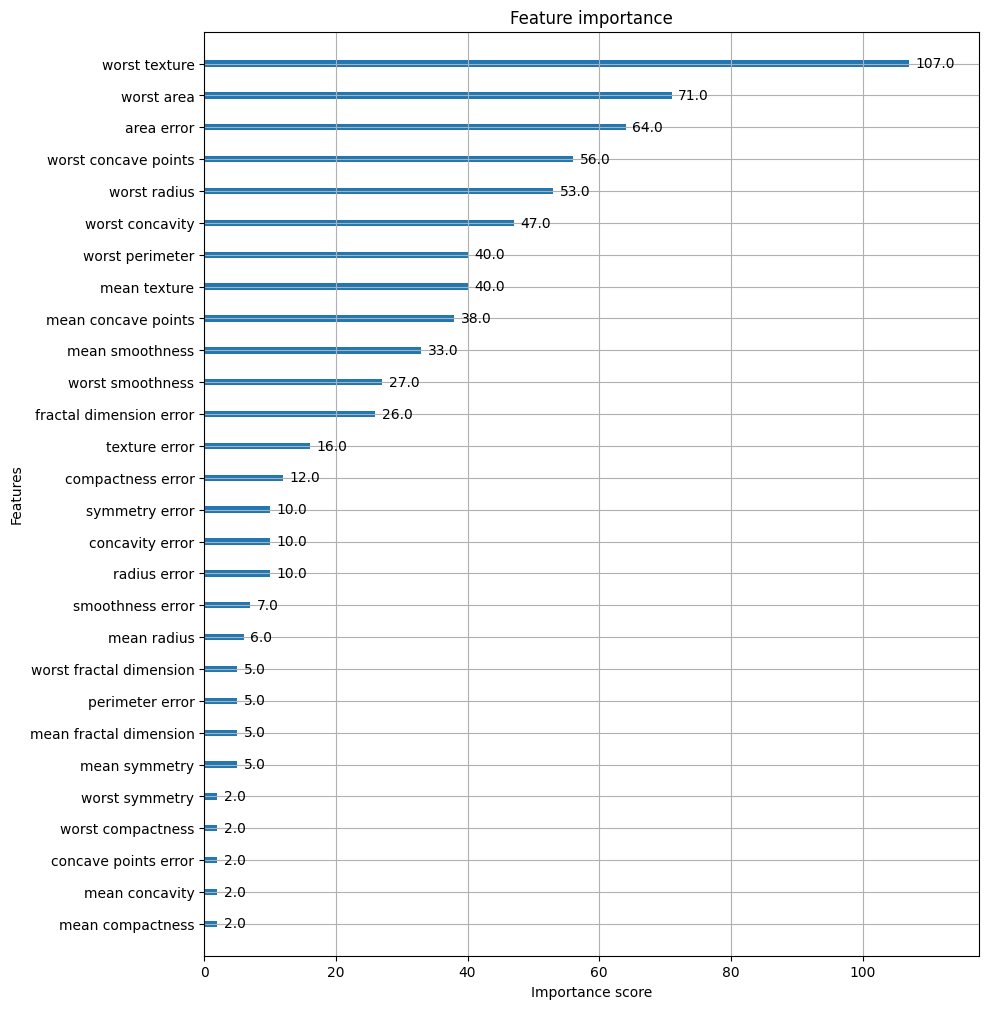

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)


## 사이킷런 래퍼 XGBoost의 개요 및 적용

In [40]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

# 모델 생성
 # Warning 메시지를 없애기 위해 eval.metric 값을 XGBClassifier 생성 인자로 입력.
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, eval_metric='logloss')

# 학습
xgb_wrapper.fit(X_train, y_train, verbose=True)

# 예측
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

# 예측 성능 평가
get_clf_eval(y_test, w_preds, w_pred_proba)


오차 행렬
[[45  1]
 [ 1 67]]
정확도: 0.9825, 정밀도: 0.9853, 재현율: 0.9853, F1: 0.9853, AUC:  0.9981


### earlystopping 적용

In [43]:
pip install --upgrade xgboost

In [45]:
# from xgboost import XGBClassifier

# # 1) 기존 early_stopping_rounds=50으로 학습
# xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)
# evals = [(X_tr, y_tr), (X_val, y_val)]

# xgb_wrapper.fit(X_tr, y_tr,
#                 early_stopping_rounds=50,
#                 eval_metric="logloss",
#                 eval_set=evals,
#                 verbose=True)

# ws50_preds = xgb_wrapper.predict(X_test)
# ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]


TypeError: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds' 해결

In [46]:
import xgboost as xgb

# DMatrix로 변환
dtrain = xgb.DMatrix(X_tr, label=y_tr)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

# 하이퍼파라미터 설정
params = {
    'max_depth': 3,
    'eta': 0.05,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}
num_rounds = 400

# 학습 (early stopping 적용)
evals = [(dtrain, 'train'), (dval, 'eval')]
xgb_model = xgb.train(params, dtrain, num_boost_round=num_rounds,
                      evals=evals, early_stopping_rounds=10)

# 예측
pred_probs = xgb_model.predict(dtest)
preds = [1 if x > 0.5 else 0 for x in pred_probs]
get_clf_eval(y_test, preds, pred_probs)


[0]	train-logloss:0.61940	eval-logloss:0.58291
[1]	train-logloss:0.58191	eval-logloss:0.55508
[2]	train-logloss:0.54803	eval-logloss:0.53007
[3]	train-logloss:0.51692	eval-logloss:0.50167
[4]	train-logloss:0.48814	eval-logloss:0.47558
[5]	train-logloss:0.46176	eval-logloss:0.45166
[6]	train-logloss:0.43749	eval-logloss:0.43036
[7]	train-logloss:0.41510	eval-logloss:0.41006
[8]	train-logloss:0.39463	eval-logloss:0.39210
[9]	train-logloss:0.37535	eval-logloss:0.37532
[10]	train-logloss:0.35736	eval-logloss:0.35966
[11]	train-logloss:0.34060	eval-logloss:0.34804
[12]	train-logloss:0.32467	eval-logloss:0.33438
[13]	train-logloss:0.30949	eval-logloss:0.32268
[14]	train-logloss:0.29544	eval-logloss:0.31111
[15]	train-logloss:0.28268	eval-logloss:0.30062
[16]	train-logloss:0.27014	eval-logloss:0.29115
[17]	train-logloss:0.25840	eval-logloss:0.28238
[18]	train-logloss:0.24698	eval-logloss:0.27320
[19]	train-logloss:0.23689	eval-logloss:0.26698
[20]	train-logloss:0.22709	eval-logloss:0.25991
[2

### 피쳐 중요도 시각화

[0]	train-logloss:0.61940	eval-logloss:0.58291
[1]	train-logloss:0.58191	eval-logloss:0.55508
[2]	train-logloss:0.54803	eval-logloss:0.53007
[3]	train-logloss:0.51692	eval-logloss:0.50167
[4]	train-logloss:0.48814	eval-logloss:0.47558
[5]	train-logloss:0.46176	eval-logloss:0.45166
[6]	train-logloss:0.43749	eval-logloss:0.43036
[7]	train-logloss:0.41510	eval-logloss:0.41006
[8]	train-logloss:0.39463	eval-logloss:0.39210
[9]	train-logloss:0.37535	eval-logloss:0.37532
[10]	train-logloss:0.35736	eval-logloss:0.35966
[11]	train-logloss:0.34060	eval-logloss:0.34804
[12]	train-logloss:0.32467	eval-logloss:0.33438
[13]	train-logloss:0.30949	eval-logloss:0.32268
[14]	train-logloss:0.29544	eval-logloss:0.31111
[15]	train-logloss:0.28268	eval-logloss:0.30062
[16]	train-logloss:0.27014	eval-logloss:0.29115
[17]	train-logloss:0.25840	eval-logloss:0.28238
[18]	train-logloss:0.24698	eval-logloss:0.27320
[19]	train-logloss:0.23689	eval-logloss:0.26698
[20]	train-logloss:0.22709	eval-logloss:0.25991
[2

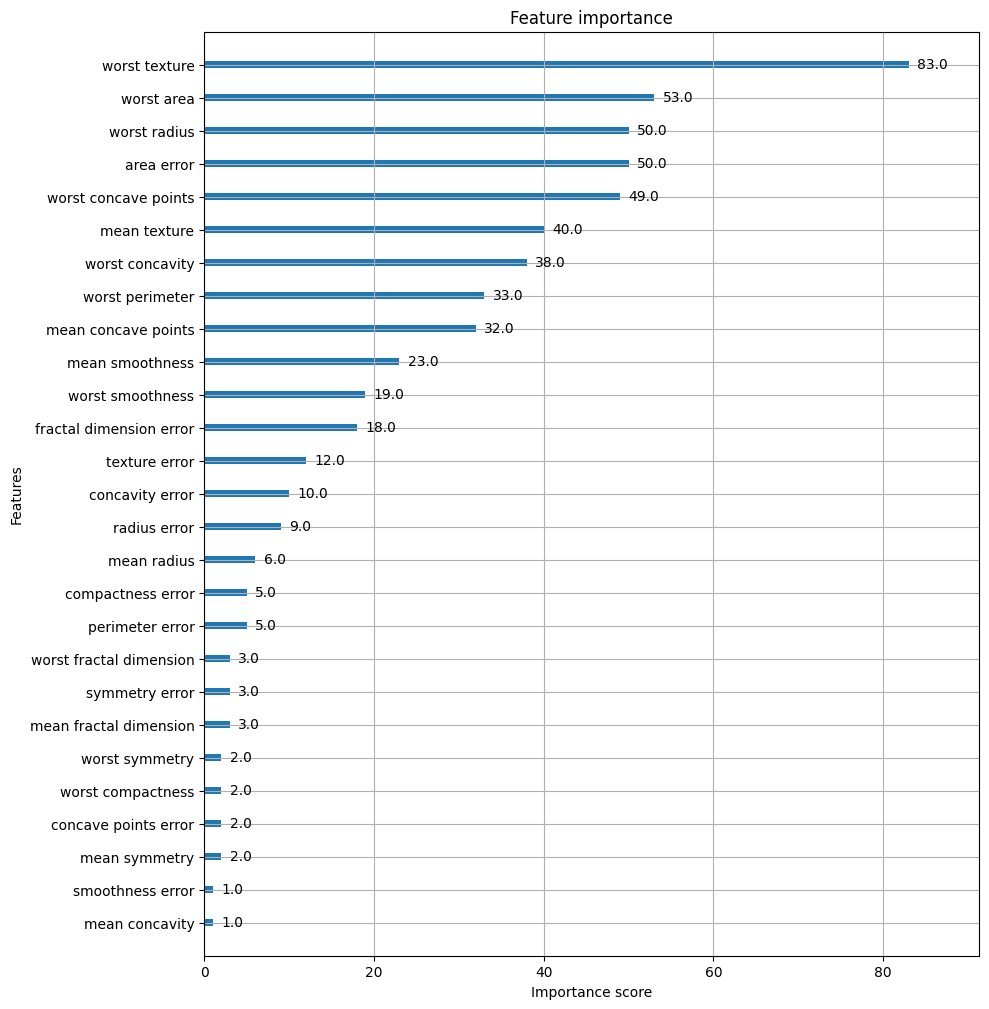

In [48]:
import xgboost as xgb
import matplotlib.pyplot as plt

# DMatrix 변환
dtrain = xgb.DMatrix(X_tr, label=y_tr)
dval = xgb.DMatrix(X_val, label=y_val)

# 파라미터
params = {'max_depth': 3, 'eta': 0.05, 'objective': 'binary:logistic'}

# 학습
evals = [(dtrain, 'train'), (dval, 'eval')]
booster = xgb.train(params, dtrain, num_boost_round=400, evals=evals, early_stopping_rounds=10)

# 피처 중요도 시각화
fig, ax = plt.subplots(figsize=(10, 12))
xgb.plot_importance(booster, ax=ax)
plt.show()


# 4.7 LightGBM

In [50]:
import lightgbm
from lightgbm import LGBMClassifier

print(lightgbm.__version__)

4.6.0


## 위스콘신 유방암 예측 - LightGBM

### 1. 데이터 준비




In [51]:
from lightgbm import LGBMClassifier
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 데이터 로드
dataset = load_breast_cancer()
cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target'] = dataset.target

# 특성과 레이블 분리
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 학습용/테스트용 데이터 분리 (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 학습용 데이터를 다시 학습/검증용으로 분리 (90% / 10%)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)


### 2. LightGBM 모델 학습 (조기 중단 적용)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 251, number of negative: 158
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4092
[LightGBM] [Info] Number of data points in the train set: 409, number of used features: 30
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.613692 -> initscore=0.462858
[LightGBM] [Info] Start training from score 0.462858
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

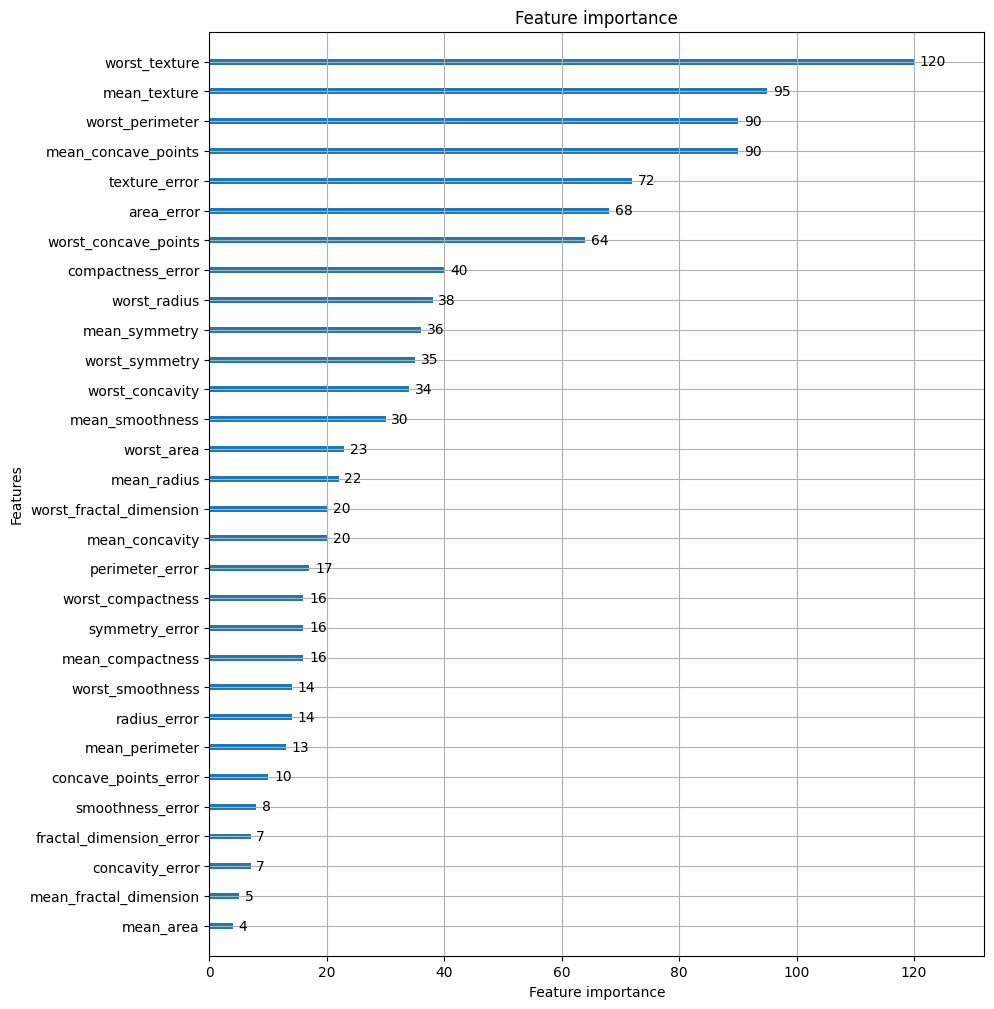

In [54]:
# LightGBM과 기타 라이브러리 임포트
from lightgbm import LGBMClassifier, early_stopping, log_evaluation, plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 데이터 로드
dataset = load_breast_cancer()
cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target'] = dataset.target

# Feature / Label 분리
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 학습용 / 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_label, test_size=0.2, random_state=156
)

# 학습 데이터를 다시 학습/검증용으로 분리
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=156
)

# LGBMClassifier 생성
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)

# 학습 및 조기 중단 적용
evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm_wrapper.fit(
    X_tr, y_tr,
    eval_set=evals,
    eval_metric="logloss",
    callbacks=[early_stopping(stopping_rounds=50), log_evaluation(10)]
)

# 예측 수행
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

# 예측 성능 평가 함수(get_clf_eval)를 사용
get_clf_eval(y_test, preds, pred_proba)

# 피처 중요도 시각화
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)
plt.show()


# 4.8 HyperOpt (베이지안 최적화)

### 주요 구성 요소

In [59]:
# 검색 공간 (search space)

from hyperopt import hp

search_space = {
    'x': hp.quniform('x', -10, 10, 1),
    'y': hp.quniform('y', -15, 15, 1)
}


In [60]:
# 목적 함수(Objective Function)

from hyperopt import STATUS_OK

def objective_func(search_space):
    x = search_space['x']
    y = search_space['y']
    retval = x**2 - 20*y
    return retval


### fmin() 함수로 최적값 탐색

In [61]:
from hyperopt import fmin, tpe, Trials
import numpy as np

trial_val = Trials()  # 관측값 저장 객체
best_01 = fmin(
    fn=objective_func,
    space=search_space,
    algo=tpe.suggest,  # TPE(Tree-structured Parzen Estimator)
    max_evals=5,       # 입력값 시도 횟수
    trials=trial_val,
    rstate=np.random.default_rng(seed=0)  # 랜덤 시드
)
print(best_01)


100%|██████████| 5/5 [00:00<00:00, 446.98trial/s, best loss: -224.0]
{'x': np.float64(-4.0), 'y': np.float64(12.0)}


In [62]:
trial_val = Trials()
best_02 = fmin(
    fn=objective_func,
    space=search_space,
    algo=tpe.suggest,
    max_evals=20,
    trials=trial_val,
    rstate=np.random.default_rng(seed=0)
)
print(best_02)


100%|██████████| 20/20 [00:00<00:00, 440.25trial/s, best loss: -296.0]
{'x': np.float64(2.0), 'y': np.float64(15.0)}


In [63]:
# fmin( )에 인자로 들어가는 Trials 객체의 result 속성에 파이썬 리스트로 목적 함수 반환값들이 저장됨
# 리스트 내부의 개별 원소는 {'loss'：함수 반환값, ‘status'：반환 상태값}와 같은 딕셔너리임.
print(trial_val.results)

[{'loss': -64.0, 'status': 'ok'}, {'loss': -184.0, 'status': 'ok'}, {'loss': 56.0, 'status': 'ok'}, {'loss': -224.0, 'status': 'ok'}, {'loss': 61.0, 'status': 'ok'}, {'loss': -296.0, 'status': 'ok'}, {'loss': -40.0, 'status': 'ok'}, {'loss': 281.0, 'status': 'ok'}, {'loss': 64.0, 'status': 'ok'}, {'loss': 100.0, 'status': 'ok'}, {'loss': 60.0, 'status': 'ok'}, {'loss': -39.0, 'status': 'ok'}, {'loss': 1.0, 'status': 'ok'}, {'loss': -164.0, 'status': 'ok'}, {'loss': 21.0, 'status': 'ok'}, {'loss': -56.0, 'status': 'ok'}, {'loss': 284.0, 'status': 'ok'}, {'loss': 176.0, 'status': 'ok'}, {'loss': -171.0, 'status': 'ok'}, {'loss': 0.0, 'status': 'ok'}]


In [64]:
import pandas as pd

# results에서 loss 값 추출
losses = [loss_dict['loss'] for loss_dict in trial_val.results]

# DataFrame 생성
result_df = pd.DataFrame({
    'x': trial_val.vals['x'],
    'y': trial_val.vals['y'],
    'losses': losses
})

result_df


,x,y,losses
0,-6.0,5.0,-64.0
1,-4.0,10.0,-184.0
2,4.0,-2.0,56.0
3,-4.0,12.0,-224.0
4,9.0,1.0,61.0
5,2.0,15.0,-296.0
6,10.0,7.0,-40.0
7,-9.0,-10.0,281.0
8,-8.0,0.0,64.0
9,-0.0,-5.0,100.0


## HyperOpt를 이용한 XGBoost 하이퍼 파라미터 최적화

In [65]:
# 데이터 분리
from sklearn.model_selection import train_test_split

# 전체 데이터 중 80% 학습, 20% 테스트
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 학습 데이터를 학습/검증 90/10 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)


In [66]:
# HyperOpt 검색 공간 설정
from hyperopt import hp

xgb_search_space = {
    'max_depth': hp.quniform('max_depth', 5, 20, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 2, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
}


In [67]:
# 목적 함수 설정
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK
import numpy as np

def objective_func(search_space):
    # n_estimators는 100으로 축소
    xgb_clf = XGBClassifier(
        n_estimators=100,
        max_depth=int(search_space['max_depth']),
        min_child_weight=int(search_space['min_child_weight']),
        learning_rate=search_space['learning_rate'],
        colsample_bytree=search_space['colsample_bytree'],
        eval_metric='logloss'
    )
    accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)
    return {'loss': -1 * np.mean(accuracy), 'status': STATUS_OK}


In [68]:
# HyperOpt 최적화 수행
from hyperopt import fmin, tpe, Trials

trial_val = Trials()
best = fmin(
    fn=objective_func,
    space=xgb_search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trial_val,
    rstate=np.random.default_rng(seed=9)
)
print('best:', best)


100%|██████████| 50/50 [00:31<00:00,  1.57trial/s, best loss: -0.9670616939700244]
best: {'colsample_bytree': np.float64(0.858999866296754), 'learning_rate': np.float64(0.17459146963933464), 'max_depth': np.float64(20.0), 'min_child_weight': np.float64(2.0)}


In [69]:
# 최적 하이퍼파라미터 적용 및 확인
print(
    'colsample_bytree: {0}, learning_rate: {1}, max_depth: {2}, min_child_weight: {3}'.format(
        round(best['colsample_bytree'], 5),
        round(best['learning_rate'], 5),
        int(best['max_depth']),
        int(best['min_child_weight'])
    )
)


colsample_bytree: 0.859, learning_rate: 0.17459, max_depth: 20, min_child_weight: 2


In [71]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_tr, label=y_tr)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',
    'learning_rate': round(best['learning_rate'], 5),
    'max_depth': int(best['max_depth']),
    'min_child_weight': int(best['min_child_weight']),
    'colsample_bytree': round(best['colsample_bytree'], 5),
    'eval_metric': 'logloss'
}

evals = [(dtrain, 'train'), (dval, 'eval')]
xgb_model = xgb.train(params, dtrain, num_boost_round=400, evals=evals, early_stopping_rounds=50)

preds = (xgb_model.predict(dtest) > 0.5).astype(int)
pred_proba = xgb_model.predict(dtest)
get_clf_eval(y_test, preds, pred_proba)


[0]	train-logloss:0.53178	eval-logloss:0.57774
[1]	train-logloss:0.43693	eval-logloss:0.53104
[2]	train-logloss:0.36375	eval-logloss:0.46939
[3]	train-logloss:0.30808	eval-logloss:0.42846
[4]	train-logloss:0.26254	eval-logloss:0.39423
[5]	train-logloss:0.22780	eval-logloss:0.36739
[6]	train-logloss:0.19887	eval-logloss:0.35126
[7]	train-logloss:0.17442	eval-logloss:0.33290
[8]	train-logloss:0.15590	eval-logloss:0.31895
[9]	train-logloss:0.13757	eval-logloss:0.30455
[10]	train-logloss:0.12339	eval-logloss:0.29727
[11]	train-logloss:0.11020	eval-logloss:0.28950
[12]	train-logloss:0.09900	eval-logloss:0.28643
[13]	train-logloss:0.09022	eval-logloss:0.28405
[14]	train-logloss:0.08217	eval-logloss:0.27688
[15]	train-logloss:0.07616	eval-logloss:0.27643
[16]	train-logloss:0.07095	eval-logloss:0.27355
[17]	train-logloss:0.06629	eval-logloss:0.27364
[18]	train-logloss:0.06119	eval-logloss:0.27173
[19]	train-logloss:0.05631	eval-logloss:0.26365
[20]	train-logloss:0.05239	eval-logloss:0.26572
[2

# 4.11 스태킹


## 기본 스태킹 모델 - 위스콘신 유방암 데이터

In [72]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이터 로딩
cancer_data = load_breast_cancer()
X_data = cancer_data.data
y_label = cancer_data.target

# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size=0.2, random_state=0)


In [73]:
# 개별 ML 모델 생성
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 최종 메타 모델
lr_final = LogisticRegression()

# 개별 모델 학습
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)


AdaBoostClassifier(n_estimators=100)

In [74]:
# 개별 모델 예측
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

# 개별 모델 정확도 출력
print('KNN 정확도: {:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {:.4f}'.format(accuracy_score(y_test, ada_pred)))


KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9035
에이다부스트 정확도: 0.9737


In [75]:
# 개별 모델 예측값을 합쳐서 스태킹 데이터 생성
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print("Before transpose:", pred.shape)

# transpose로 행과 열 교환 -> 각 모델의 예측값을 피처로 사용
pred = np.transpose(pred)
print("After transpose:", pred.shape)


Before transpose: (4, 114)
After transpose: (114, 4)


In [76]:
# 메타 모델 학습
lr_final.fit(pred, y_test)

# 최종 예측
final_pred = lr_final.predict(pred)
print('최종 메타 모델 정확도: {:.4f}'.format(accuracy_score(y_test, final_pred)))


최종 메타 모델 정확도: 0.9737


결과 요약

개별 모델의 예측값을 스태킹으로 재구성하여 Meta 모델에서 학습 후 예측

예제에서는 **최종 정확도 97.37%**로 개별 모델보다 향상

주의: 스태킹이 항상 성능을 향상시키는 것은 아님

## CV 스태킹

In [81]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

# 데이터 로딩
cancer_data = load_breast_cancer()
X_train = cancer_data.data
y_train = cancer_data.target
X_test = X_train.copy()  # 예제에서는 테스트 데이터로 학습 데이터 사용
y_test = y_train.copy()

# 개별 모델 정의
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 최종 메타 모델 정의
lr_final = LogisticRegression(max_iter=1000)

# Step 1: 개별 기반 모델에서 최종 메타 모델이 사용할 학습/테스트 데이터 생성 함수
def get_stacking_base_datasets(modelz, X_train_nz, y_train_n, X_test_nz, n_folds):
    kf = KFold(n_splits=n_folds, shuffle=False)

    # 메타 모델 학습/테스트용 배열 초기화
    train_fold_pred = np.zeros((X_train_nz.shape[0], 1))
    test_pred = np.zeros((X_test_nz.shape[0], n_folds))

    print(modelz.__class__.__name__, "model 시작")

    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_nz)):
        print('\t폴드 세트:', folder_counter, "시작")
        X_tr = X_train_nz[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_nz[valid_index]

        # 폴드 내 학습
        modelz.fit(X_tr, y_tr)

        # 검증 데이터 예측 → 학습용 스태킹 데이터
        train_fold_pred[valid_index, :] = modelz.predict(X_te).reshape(-1, 1)

        # 원본 테스트 데이터 예측 → 테스트용 스태킹 데이터
        test_pred[:, folder_counter] = modelz.predict(X_test_nz)

    # Fold별 테스트 예측 평균 → 최종 테스트용
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1, 1)

    return train_fold_pred, test_pred_mean

# Step 1: Base 모델별 스태킹 데이터 생성
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test, 7)
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

# Step 2: 각 모델별 학습/테스트 데이터 합치기
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)

print("원본 학습 피처 데이터 Shape:", X_train.shape, "원본 테스트 피처 Shape:", X_test.shape)
print("스태킹 학습 피처 데이터 Shape:", Stack_final_X_train.shape,
      "스태킹 테스트 피처 데이터 Shape:", Stack_final_X_test.shape)

# 최종 메타 모델 학습 및 예측
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도: {:.4f}'.format(accuracy_score(y_test, stack_final)))


KNeighborsClassifier model 시작
	폴드 세트: 0 시작
	폴드 세트: 1 시작
	폴드 세트: 2 시작
	폴드 세트: 3 시작
	폴드 세트: 4 시작
	폴드 세트: 5 시작
	폴드 세트: 6 시작
RandomForestClassifier model 시작
	폴드 세트: 0 시작
	폴드 세트: 1 시작
	폴드 세트: 2 시작
	폴드 세트: 3 시작
	폴드 세트: 4 시작
	폴드 세트: 5 시작
	폴드 세트: 6 시작
DecisionTreeClassifier model 시작
	폴드 세트: 0 시작
	폴드 세트: 1 시작
	폴드 세트: 2 시작
	폴드 세트: 3 시작
	폴드 세트: 4 시작
	폴드 세트: 5 시작
	폴드 세트: 6 시작
AdaBoostClassifier model 시작
	폴드 세트: 0 시작
	폴드 세트: 1 시작
	폴드 세트: 2 시작
	폴드 세트: 3 시작
	폴드 세트: 4 시작
	폴드 세트: 5 시작
	폴드 세트: 6 시작
원본 학습 피처 데이터 Shape: (569, 30) 원본 테스트 피처 Shape: (569, 30)
스태킹 학습 피처 데이터 Shape: (569, 4) 스태킹 테스트 피처 데이터 Shape: (569, 4)
최종 메타 모델의 예측 정확도: 1.0000
